## Exercise 3 - **Volcanic bomb**

The goal of this exercise is to consolidate:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- update rule
- `if` condition

You will now simulate the trajectory of a [volcanic bomb](https://en.wikipedia.org/wiki/Volcanic_bomb) that got ejected during a volcanic eruption. The ejection speed is given by the horizontal and vertical velocity components
$$
V_x = \frac{\partial x}{\partial t}\\[10pt]
V_y = \frac{\partial y}{\partial t}
$$

Once ejected, the volcanic bomb is subject to gravity acceleration $g$. Air friction will be neglected. Acceleration being defined as the change of velocity over time, we obtain the following update rule:
$$
\frac{\partial V_y}{\partial t}=-g
$$

These equations define a mathematical model describing the kinematics of the volcanic bomb. You may remember from your studies how to solve those equation analytically; however we'll here focus on a numerical solution using a similar approach as for the previous exercises. The $x$ and $y$ location of the bomb as function of time can be obtained based on updating previous values using the definition of velocity:
$$
x_{t+\Delta t} = x_{t} + V_x    \Delta t~,\\[5pt]
y_{t+\Delta t} = y_{t} + V_y(t) \Delta t~.
$$
And because of gravity acceleration, the $V_y$ velocity evolution can be obtained according to
$$
V_{y,t+\Delta t} = V_{y,t} - g \Delta t~.
$$

The 3 equations above represent the discretised form of the 3 first equations and should be used to solve the problem numerically. The initial position of the volcanic bomb $(x_0, y_0)=(0,480)$ m. The magnitude of the ejection speed is of 120 m/s and the angle $\alpha = 60°$. The simulation stops when the volcanic bomb touches the ground ($y=0$).

> 💡 hint:
> - Modify the code from exercise 2 to, in addition, account for the change of `Vy` with time
> - Use e.g. a `break` statement to exit the loop once the bomb hits the ground

## Code

In [1]:
using Plots

In [2]:
@views function volcanic_2D!(V::R, Φ::R, x0::R, y0::R, ttot::R, L::R, dt::R) where {R<:Real}
    # numerical parameters
    g = 9.80665 # gravitational accelaration m/s^2

    
    # induced numerical parameters
    nt = Int(cld(ttot, dt)) # no. steps

    # Φ - angle of eruption
    Vx = V * cosd(Φ)   # east - west direction   => speed changes when hit the limit L 
    Vy = V * sind(Φ)   # north - south direction => speed remains constant

    # Array initialisation
    T   = Array{Float64}(undef, nt)    # timesteps
    P_X = Array{Float64}(undef, nt)  # position
    P_Y = Array{Float64}(undef, nt)
    V_y = Array{Float64}(undef, nt)  # velocity


    T[1] = 0.0
    P_X[1] = x0
    P_Y[1] = y0
    V_y[1] = Vy

    height = 0.

    # Time loop
    for i = 2:nt
        T[i] = T[i-1] + dt  # time stepping
        
        V_y[i] = V_y[i-1] - g * dt   # updating Vy

        P_X[i] = P_X[i-1] + Vx * dt      # move the rock along x-axis
        P_Y[i] = P_Y[i-1] + V_y[i] * dt  # move the rock along y-axis

        #### Find the height for Q1 #####
        if P_X[i] ≈ 900. # for Q1. report the height at position x=900 m away from origin
            height = P_Y[i]
        end
        #################################

        if P_Y[i] < L      # exit the loop when hitting the ground
            # truncate the arrays to be plotted
            T = T[1:i]
            P_X = P_X[1:i]
            P_Y = P_Y[1:i]
            break
        end

    end

    # Visualisation
    display(scatter3d(T, P_X, P_Y, markersize=0.5, mc=:red,
          title=("Time step dt = " * string(dt)), 
          xlabel="time, s",
          ylabel="x-axis, m",
          zlabel="y-axis, m",
          framestyle=:box, legend=:none))

    
    return height

end

volcanic_2D! (generic function with 1 method)

In [3]:
# definining the parameters
V = 120.   # speed at eruption m/s
Φ = 60.    # angle at eruption in deg
x0 = 0.    # initial position x-axis
y0 = 480.  #                  y-axis
ttot = 100.
L = 0.     # spatial limit => hitting the ground
dt = 0.01

0.01

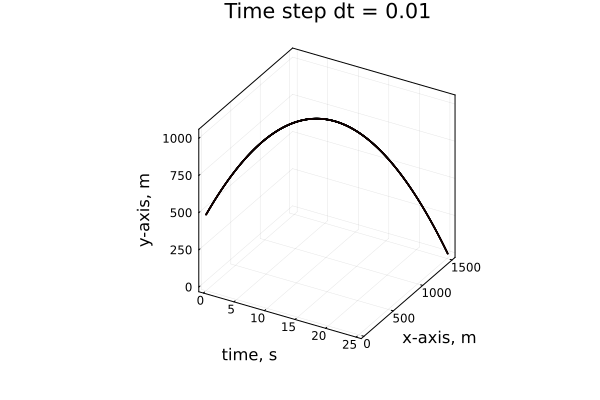

934.8621030619738

In [4]:
volcanic_2D!(V, Φ, x0, y0, ttot, L, dt)

### Question 1

Report the height of the volcanic bomb at position $x=900$ m away from origin.

### Answer 1


To obtain the height of the volcanic bomb at position $x=900$, we need the previously implemented method to return us the y-position (height) when the condition is reached. We then return this number of the y-position as the return value of the function.

Which yields    $y = 934.8621030619738$